# Orbits in Phase-Space

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy
from numpy import arange
from numpy import meshgrid

<IPython.core.display.Javascript object>


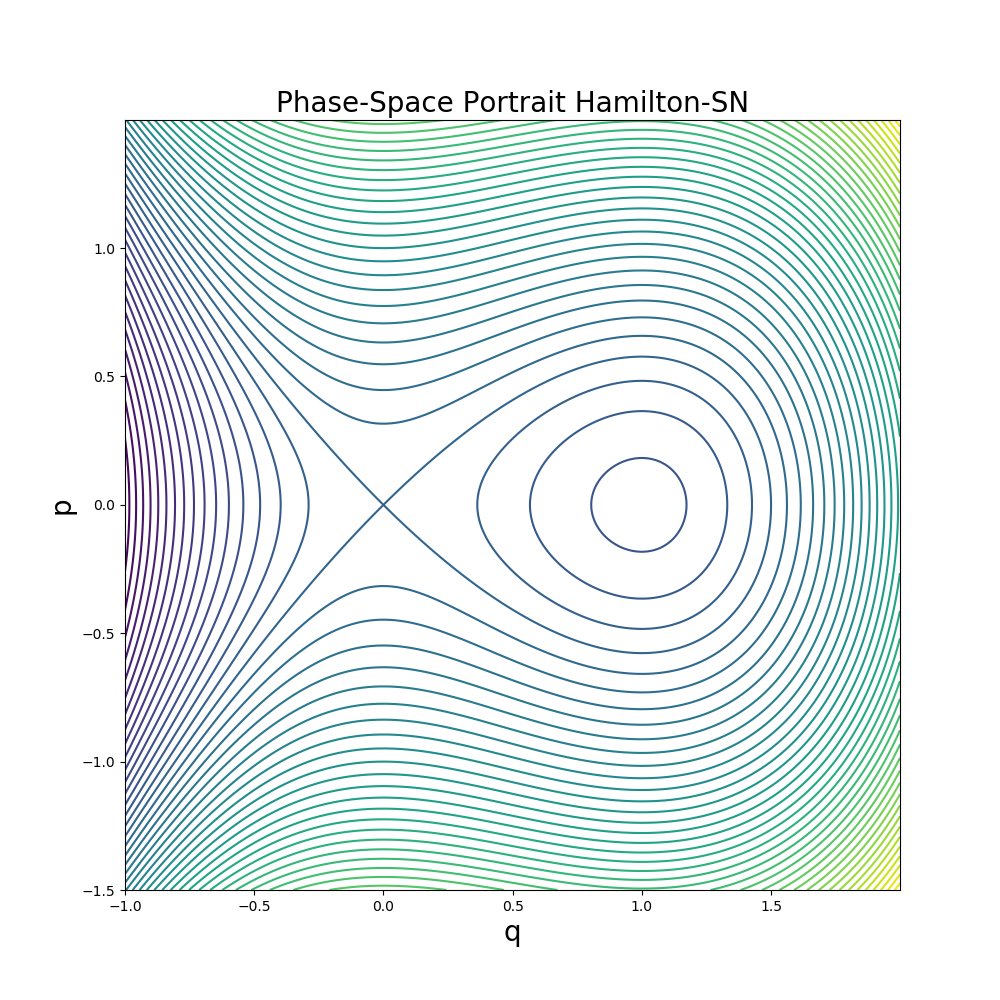

In [5]:
# Mesh of initial conditions in 2D plane
delta = 0.001
xrange = arange(-1, 2.0, delta)
yrange = arange(-1.5, 1.5, delta)
q0, p0 = meshgrid(xrange,yrange)

# Parameters for Ham Saddle-Node
MU = 0.25
ALPHA = 1

# Hamiltonian
H0 = 0.5*p0**2 - numpy.sqrt(MU)*q0**2 + ALPHA*q0**3/3

# Plot vector field
fig,ax = plt.subplots(figsize=(10,10),dpi=100)

ax.set_title('Phase-Space Portrait Hamilton-SN', fontsize=20)
ax.set_xlabel('q', fontsize=20)
ax.set_ylabel('p', fontsize=20)
orbits = ax.contour(q0,p0,H0,60)

plt.show()

# Numerical Solution

* Use RG 4order
* Check energy conservation

<IPython.core.display.Javascript object>


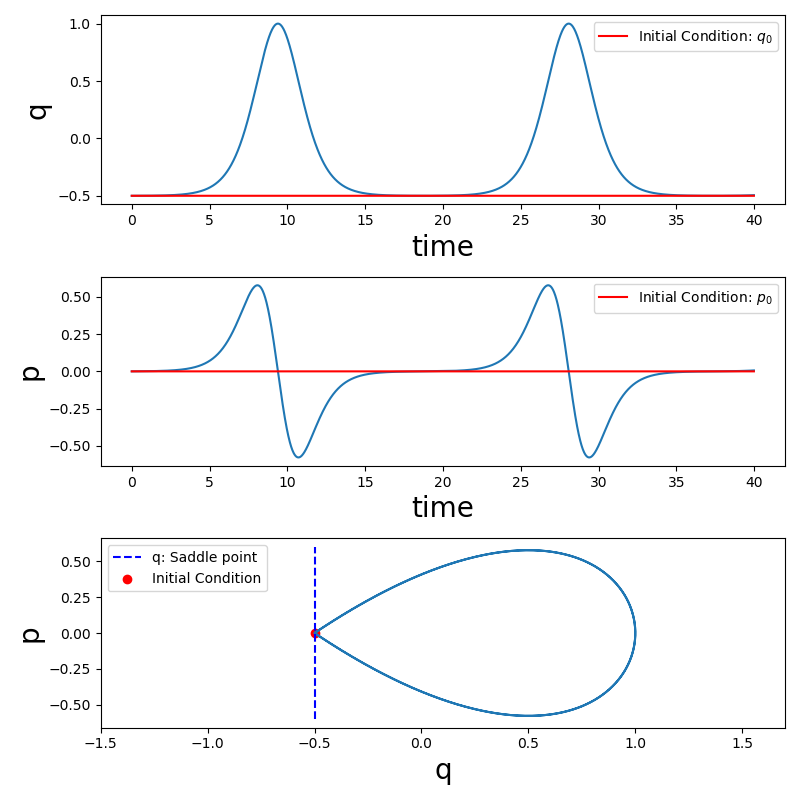

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    q, p = y      # unpack current values of y
    MU, ALPHA = params  # unpack parameters
    derivs = [p, MU - q**2]     # list of dy/dt=f functions
    return derivs

# Parameters
MU = 0.25
ALPHA = 1

# Initial values
# Parameters for non-closed path
#q0 = -numpy.sqrt(MU)+0.001 # initial angular displacement
#p0 = 0.01    # initial angular velocity

# Parameters closed-path
q0 = -numpy.sqrt(MU)+0.001 # initial angular displacement
p0 = 0.0    # initial angular velocity

# Bundle parameters for ODE solver
params = [MU, ALPHA]

# Bundle initial conditions for ODE solver
y0 = [q0, p0]

# Make time array for solution
tStop = 40
tInc = 0.02
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.plot(t,numpy.ones(len(t))*q0,c='red',label='Initial Condition: $q_0$')
ax1.set_xlabel('time', fontsize=20)
ax1.set_ylabel('q', fontsize=20)
ax1.legend()

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.plot(t,numpy.ones(len(t))*p0,c='red',label='Initial Condition: $p_0$')
ax2.set_xlabel('time', fontsize=20)
ax2.set_ylabel('p', fontsize=20)
ax2.legend()

# Plot omega vs theta
ax3 = fig.add_subplot(313)
ax3.scatter(q0,p0,c='r',label='Initial Condition')
twopi = 1.7
ax3.plot(psoln[:,0], psoln[:,1])
ax3.plot([-numpy.sqrt(MU), -numpy.sqrt(MU)],[-0.6,0.6],'--',c='blue',label='q: Saddle point')
ax3.set_xlabel('q', fontsize=20)
ax3.set_ylabel('p', fontsize=20)
ax3.set_xlim(-1.5, twopi)
ax3.legend()

plt.tight_layout()
plt.show()

# Invertibility of $D_0^1$ data matrices

Show invertability for data matrices constructed from the above trajectory path 

Construct data matrices for consecutive frames

In [10]:
mydata = []
for i in range(len(psoln)-1):
    X0 = psoln[i]
    X1 = psoln[i+1]
    D01 = numpy.array([X0, X1])
    D01_det = numpy.linalg.det(D01)
    mydata.append(D01_det)

<IPython.core.display.Javascript object>


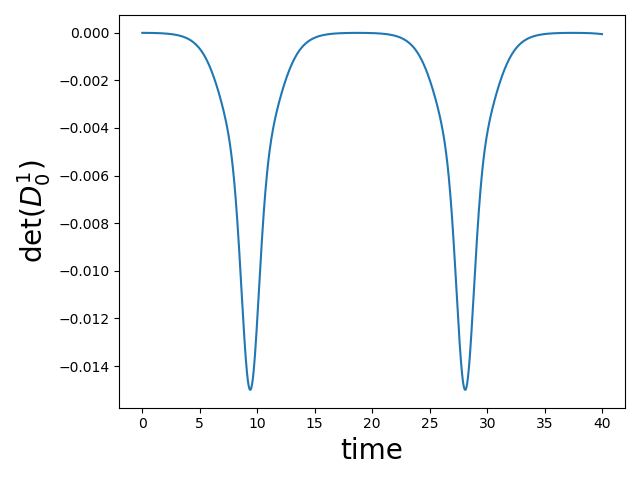

In [11]:
fig = plt.figure()
plt.plot(t[1:],mydata)
plt.xlabel('time', fontsize=20)
plt.ylabel('det($D_0^1$)', fontsize=20)
fig.tight_layout()
plt.show()

<span style='color:blue'><b>OBSERVATION</b></span> $det(D_0^1(t))$ behaves like a periodic function in time, which becomes zero whenever close to the saddle point.  

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(list(psoln[1:,0]), list(psoln[1:,1]), mydata)

ax.set_xlabel('q', fontsize = 20)
ax.set_ylabel('p', fontsize = 20)
ax.set_zlabel('det($D_0^1$)', fontsize = 20)

delta = 0.1
xrange = arange(-2, 2, delta)
yrange = arange(-2, 2, delta)
q0, p0 = meshgrid(xrange,yrange)

ax.plot_surface(q0,p0,q0*p0*0,color='blue',alpha=0.2)

plt.show()


# Sample I.Cs from different types of orbits

<IPython.core.display.Javascript object>


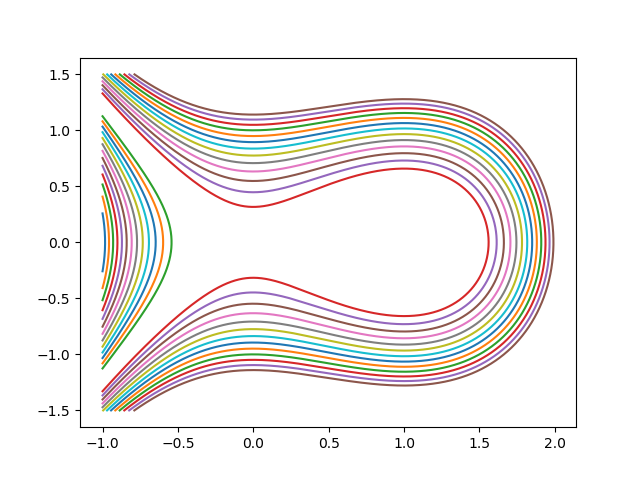

In [16]:
fig = plt.figure()

# N = len(orbits.allsegs[:][0])
for i in range(54):
    if len(orbits.allsegs[i]) == 1:
        for j in range(len(orbits.allsegs[i])):
            x,y = orbits.allsegs[i][j].T
            plt.plot(x,y)
    
plt.show()

<IPython.core.display.Javascript object>


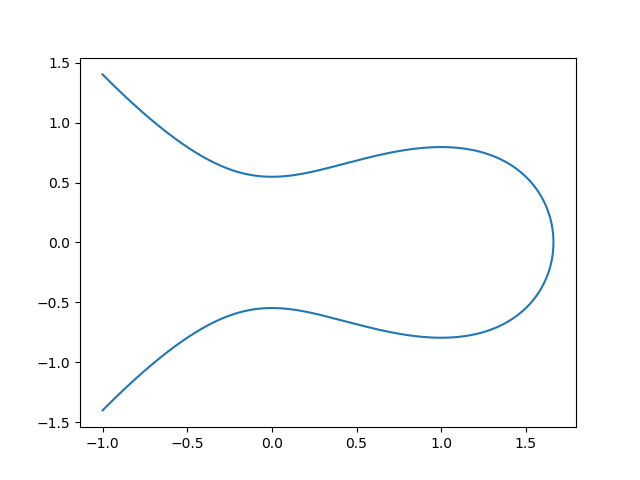

In [17]:
fig = plt.figure()
N_chosen = 20
x,y = orbits.allsegs[N_chosen][0].T
plt.plot(x,y)

__TEST__

<IPython.core.display.Javascript object>


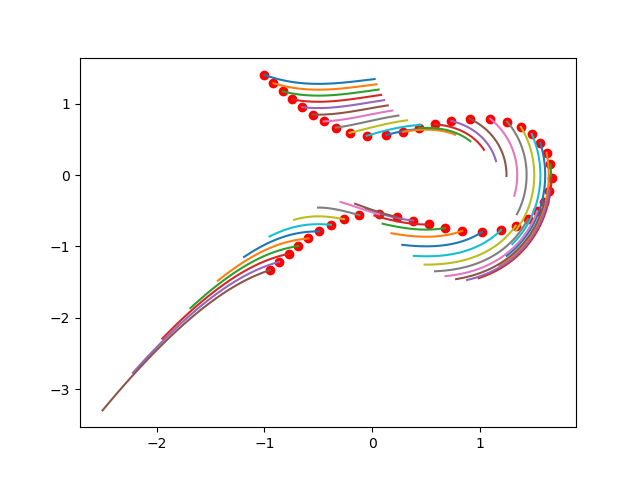

<IPython.core.display.Javascript object>


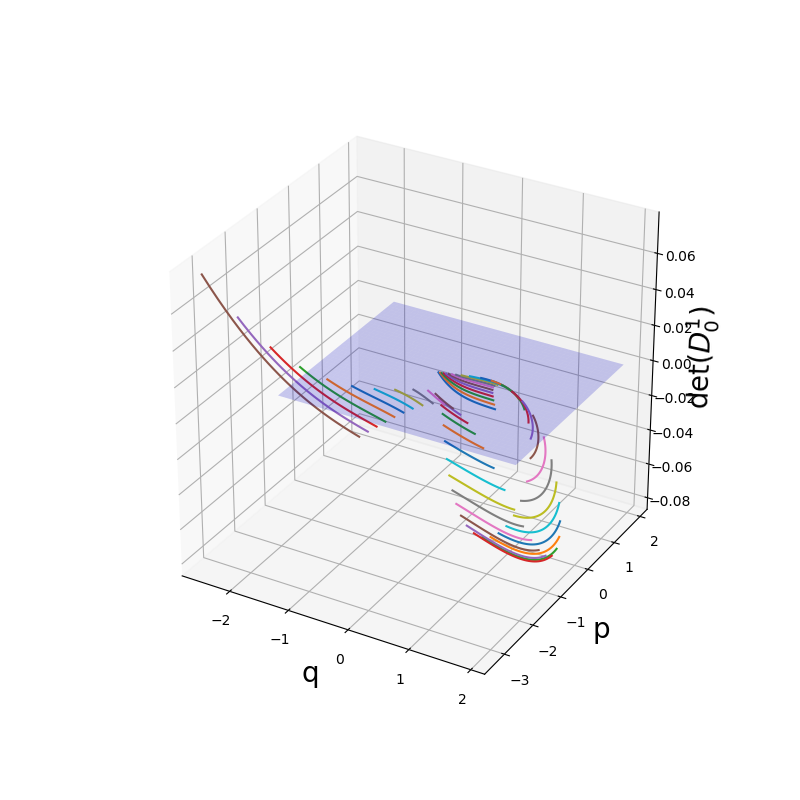

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def f(y, t, params):
    q, p = y      # unpack current values of y
    MU, ALPHA = params  # unpack parameters
    derivs = [p, MU - q**2]     # list of dy/dt=f functions
    return derivs

# Parameters
MU = 0.25
ALPHA = 1

# Bundle parameters for ODE solver
params = [MU, ALPHA]

fig,ax = plt.subplots()

fig3d = plt.figure(figsize=(8,8))
ax3d = fig3d.add_subplot(111, projection='3d')

# Make time array for solution
tStop = 0.8
tInc = 0.02
t = np.arange(0., tStop, tInc)

Q0,P0 = orbits.allsegs[N_chosen][0].T

for i in range(0,len(Q0),200):
    q0 = Q0[i]; p0 = P0[i]
    # Bundle initial conditions for ODE solver
    y0 = [q0, p0]
    ax.scatter(q0,p0,c='r')
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    ax.plot(psoln[:,0], psoln[:,1])
    
    # Compute determinant for data matrices
    mydata = []
    for i in range(len(psoln)-1):
        X0 = psoln[i]
        X1 = psoln[i+1]
        D01 = numpy.array([X0, X1])
        D01_det = numpy.linalg.det(D01)
        mydata.append(D01_det)
    
    ax3d.plot(list(psoln[1:,0]), list(psoln[1:,1]), mydata)

    ax3d.set_xlabel('q', fontsize = 20)
    ax3d.set_ylabel('p', fontsize = 20)
    ax3d.set_zlabel('det($D_0^1$)', fontsize = 20)

    delta = 0.1
    xrange = arange(-2, 2, delta)
    yrange = arange(-2, 2, delta)
    sx, sy = meshgrid(xrange,yrange)


ax3d.plot_surface(sx,sy,sx*sy*0,color='blue',alpha=0.2)
plt.show()

<IPython.core.display.Javascript object>


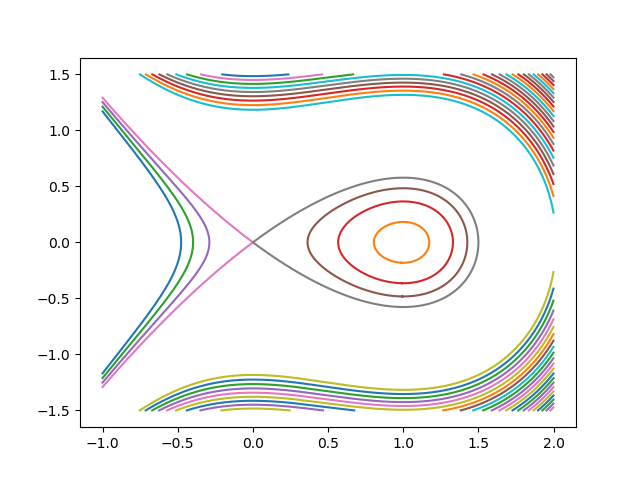

14
15
16
17
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


In [19]:
fig = plt.figure()

# N = len(orbits.allsegs[:][0])
for i in range(54):
    if len(orbits.allsegs[i]) > 1:
        print(i)
        for j in range(len(orbits.allsegs[i])):
            x,y = orbits.allsegs[i][j].T
            plt.plot(x,y)
    
plt.show()

<IPython.core.display.Javascript object>


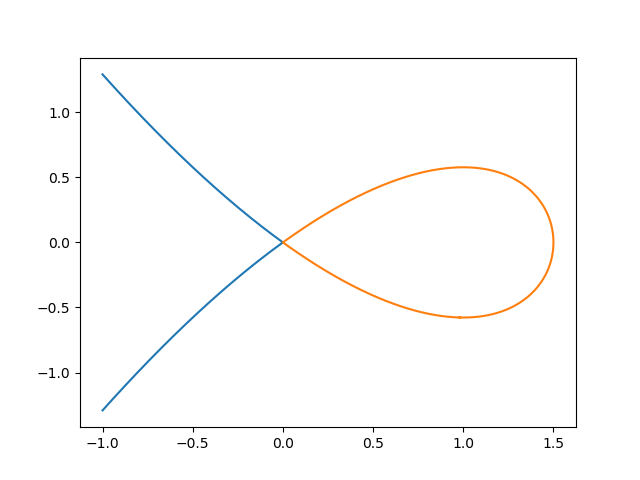

In [20]:
fig = plt.figure()

N_chosen = 17
for j in range(len(orbits.allsegs[N_chosen])):
    x,y = orbits.allsegs[N_chosen][j].T
    plt.plot(x,y)

plt.show()

__TEST__

<IPython.core.display.Javascript object>


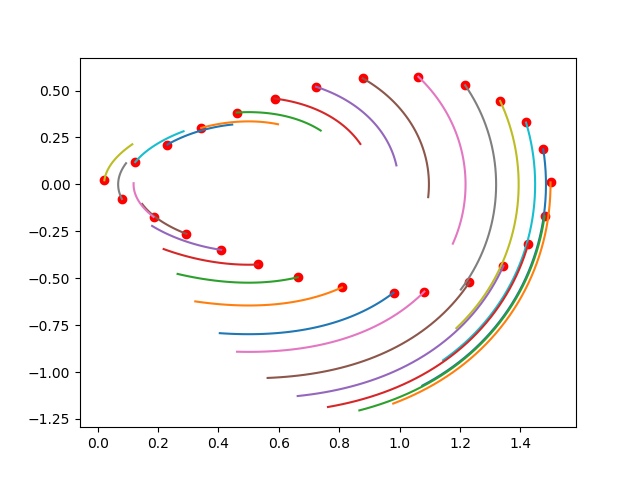

<IPython.core.display.Javascript object>


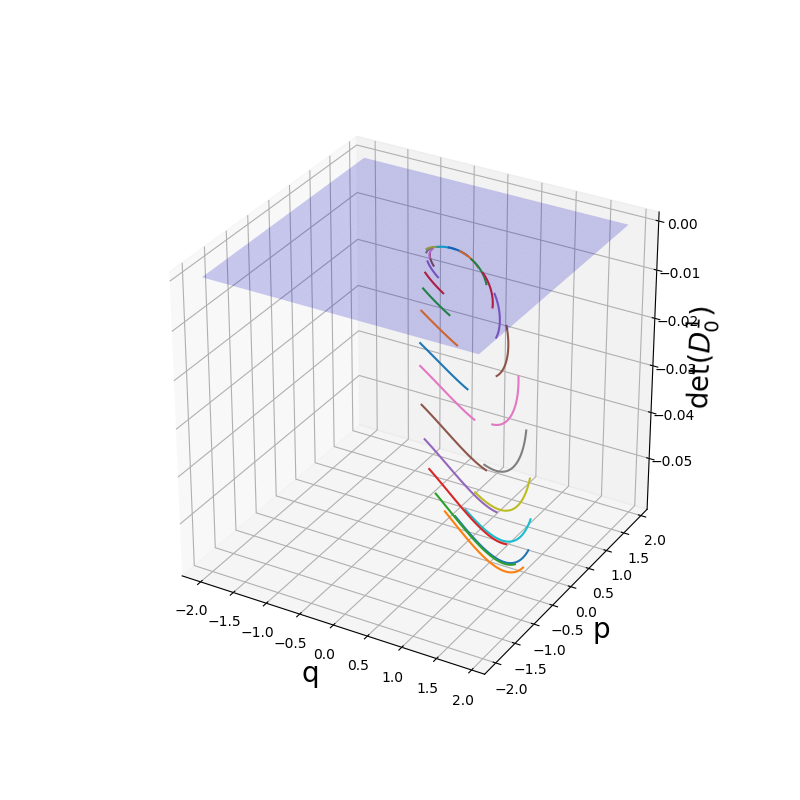

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

def f(y, t, params):
    q, p = y      # unpack current values of y
    MU, ALPHA = params  # unpack parameters
    derivs = [p, MU - q**2]     # list of dy/dt=f functions
    return derivs

# Parameters
MU = 0.25
ALPHA = 1

# Bundle parameters for ODE solver
params = [MU, ALPHA]

fig,ax = plt.subplots()

fig3d = plt.figure(figsize=(8,8))
ax3d = fig3d.add_subplot(111, projection='3d')

# Make time array for solution
tStop = 0.8
tInc = 0.02
t = np.arange(0., tStop, tInc)

Q0,P0 = orbits.allsegs[N_chosen][1].T

for i in range(0,len(Q0),200):
    q0 = Q0[i]; p0 = P0[i]
    # Bundle initial conditions for ODE solver
    y0 = [q0, p0]
    ax.scatter(q0,p0,c='r')
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    ax.plot(psoln[:,0], psoln[:,1])
    
    # Compute determinant for data matrices
    mydata = []
    for i in range(len(psoln)-1):
        X0 = psoln[i]
        X1 = psoln[i+1]
        D01 = numpy.array([X0, X1])
        D01_det = numpy.linalg.det(D01)
        mydata.append(D01_det)
    
    ax3d.plot(list(psoln[1:,0]), list(psoln[1:,1]), mydata)

    ax3d.set_xlabel('q', fontsize = 20)
    ax3d.set_ylabel('p', fontsize = 20)
    ax3d.set_zlabel('det($D_0^1$)', fontsize = 20)

    delta = 0.1
    xrange = arange(-2, 2, delta)
    yrange = arange(-2, 2, delta)
    sx, sy = meshgrid(xrange,yrange)


ax3d.plot_surface(sx,sy,sx*sy*0,color='blue',alpha=0.2)
plt.show()